# Battle of Neighborhoods

# 1.Discussion and Background of the Business Problem

For the capstone project I am considering a scenario of selecting a suitable site for opening an Indian restaurants in Melbourne metropolitan area.
Melbourne has a vibrant Indian community with Indian-born migrants making up 3 per cent of Melbourne’s total population. Since 2001 the number of Indian-born migrants in Melbourne has more than tripled. There may not be enough Indian restaurants in Melbourne and it might present a great opportunity for an entrepreneur who is wants to open an Indian restaurant in Melbourne.

Business Problem
The objective of this capstone project is to find the most suitable location for the entrepreneur to open a new Indian restaurant in Melbourne,Australia. 



# 2.Data Preparation

In [1]:
# import the necessary Libraries 
import sys
import requests
import json

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors


import io
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab

import folium


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.3.1               |             py_0          25 KB  conda-forge
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-2.2.2               |           py35_1         462 KB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.0 MB

The following NEW packages will

# Getting Coordinates of Major Cities : Geopy Client

In [82]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()



,City,Latitude,Longitude
0,Endeavour Hills,-37.9759,145.2578
1,Cranbourne,-38.1083,145.2844
2,Berwick,-38.0309,145.3461
3,Narre Warren,-38.0271,145.3030
4,Tooradin,-38.2111,145.3800


In [83]:
# get Melbourne Latitude and Longitude 

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
address = 'Melbourne'

geolocator = Nominatim(user_agent="Melbourne_explorer")
location = geolocator.geocode(address)
Melbourne_latitude = location.latitude
Melbourne_longitude = location.longitude
print('The geograpical coordinates of Melbourne are {}, {}.'.format(Melbourne_latitude, Melbourne_longitude))

The geograpical coordinates of Melbourne are -37.8142176, 144.9631608.


In [116]:

# # create map of most popular cities with high Indian population using latitude and longitude values
Melbourne = folium.Map(location=[Melbourne_latitude, Melbourne_longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(df_data_2['Latitude'],df_data_2['Longitude'],df_data_2['City']): 
                           
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=9,
        popup=label,
        color='magenta',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(Melbourne)  
    


In [117]:
Melbourne

# Getting Ready to Use FourSquare API

In [1]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


# To decide which city  is best for opening a restaurant, We will explore the areas around the cities 


Exploring the Major Districts
Create the get request url (Foursquare ID and Secret are necessary)

Number of Venues we will look for is 100 

Radius of Search Would be 1 k.m.

Create a json from the request object (Need requests Module) 

Create the lists Containing all the information 

From the lists create the dataframe. 

In [119]:
radius = 1000
LIMIT = 1000

def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City_Latitude', 
                  'City_Longitude', 
                  'Venue', 
                  'Venue_Lat', 
                  'Venue_Long', 
                  'Venue_Category']
    
    return(nearby_venues)

In [120]:
Melbourne_venues= getNearbyVenues(names=df_data_2['City'],
                                   latitudes=df_data_2['Latitude'],
                                   longitudes=df_data_2['Longitude']
                                  )

Endeavour Hills
Cranbourne
Berwick
Narre Warren
Tooradin
Springvale
Keysborough
Noble Park
Dandenong
Lyndhurst
Chadstone
Oakleigh
Glen Waverley
Mulgrave
Clayton
Point Cook
Werribee
Tarneit
Taylors Lakes
Deer Park
St Albans
Sunshine
Keilor
Casey
Greater Dandenong
Monash
Brimbank
Wyndham


In [121]:
print ("Shape of the Venues Dataframe: ", Melbourne_venues.shape)
Melbourne_venues.tail(10)

Shape of the Venues Dataframe:  (532, 7)


,City,City_Latitude,City_Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
522,Wyndham,-37.9119,144.6533,Werribee Indoor Sports Centre,-37.913385,144.658992,Track
523,Wyndham,-37.9119,144.6533,Werribee Superbowl,-37.912548,144.660643,Bowling Alley
524,Wyndham,-37.9119,144.6533,Avalon Airport Oval (Chirnside Park),-37.904207,144.652642,Park
525,Wyndham,-37.9119,144.6533,The South Corner,-37.906484,144.660297,Café
526,Wyndham,-37.9119,144.6533,Ghazal,-37.903893,144.657058,Indian Restaurant
527,Wyndham,-37.9119,144.6533,Accettas Wood Fire Pizza House,-37.903848,144.657106,Pizza Place
528,Wyndham,-37.9119,144.6533,Pow! Fridays At Mynt Lounge,-37.903856,144.657249,Rock Club
529,Wyndham,-37.9119,144.6533,Mynt Lounge,-37.903695,144.657283,Lounge
530,Wyndham,-37.9119,144.6533,Ploy Thai,-37.903610,144.657137,Thai Restaurant
531,Wyndham,-37.9119,144.6533,Caffé Aroma,-37.903430,144.657029,Café


In [122]:
# Create a Data-Frame out of it to Concentrate Only on Restaurants 

Melbourne_venues_only_restaurant = Melbourne_venues[Melbourne_venues['Venue_Category']\
                                                          .str.contains('Restaurant')].reset_index(drop=True)
Melbourne_venues_only_restaurant.index = np.arange(1, len(Melbourne_venues_only_restaurant)+1)
print ("Shape of the Data-Frame with Venue Category only Restaurant: ", Melbourne_venues_only_restaurant.shape)
Melbourne_venues_only_restaurant.head(100)

Shape of the Data-Frame with Venue Category only Restaurant:  (171, 7)


,City,City_Latitude,City_Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
1,Endeavour Hills,-37.9759,145.2578,KFC,-37.975799,145.259267,Fast Food Restaurant
2,Endeavour Hills,-37.9759,145.2578,Dancing Wok,-37.977585,145.261467,Chinese Restaurant
3,Cranbourne,-38.1083,145.2844,Red Rooster,-38.105619,145.281607,Fast Food Restaurant
4,Cranbourne,-38.1083,145.2844,KFC,-38.107170,145.283246,Fast Food Restaurant
5,Cranbourne,-38.1083,145.2844,McDonald's,-38.110270,145.281629,Fast Food Restaurant
6,Berwick,-38.0309,145.3461,Shanikas,-38.031149,145.346826,Italian Restaurant
7,Berwick,-38.0309,145.3461,Berwick Thai Restaurant,-38.031114,145.343879,Thai Restaurant
8,Narre Warren,-38.0271,145.3030,Nando's,-38.025230,145.305687,Portuguese Restaurant
9,Narre Warren,-38.0271,145.3030,Ming Court Resturant,-38.025127,145.304454,Asian Restaurant
10,Narre Warren,-38.0271,145.3030,The Pancake Parlour,-38.018194,145.302502,Australian Restaurant


In [123]:
## Show in Map the Top Rated Restaruants in Melbourne

map_restaurants = folium.Map(location=[Melbourne_latitude, Melbourne_longitude], zoom_start=11, tiles="openstreetmap", 
                            attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the Venues based on the Major Districts
City=['Endeavour Hills','Cranbourne','Berwick','Narre Warren','Tooradin','Springvale','Keysborough','Noble Park','Dandenong','Lyndhurst','Chadstone','Oakleigh','Glen Waverley','Mulgrave','Clayton','Point Cook','Werribee','Tarneit','Little River','Taylors Lakes','Deer Park','St Albans','Sunshine','Keilor','Casey','Greater Dandenong','Monash','Brimbank','Wyndham']

x = np.arange(len(City))

rainbow=['#FF0000', '#008000','#FFFF00','#0000FF' ,'#800080','#800000','#bc8f8f','#808080','#fffaf0','#ffb6c1','#9400d3','#0000ff','#87cefa','#40e0d0','#006400', '#ffff00','#8b0000','#f08080' ,'#00ffff','#800000','#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000','#800000','#00008b','#6a5acd']



# add markers to the map
# markers_colors = []
for lat, lon, poi, city in zip(Melbourne_venues_only_restaurant['Venue_Lat'], 
                                 Melbourne_venues_only_restaurant['Venue_Long'], 
                                  Melbourne_venues_only_restaurant['Venue_Category'], 
                                  Melbourne_venues_only_restaurant['City']):
    label = folium.Popup(str(poi) + ' ' + str(City), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[City.index(city)-1],
        fill=True,
        fill_color=rainbow[City.index(city)-1],
        fill_opacity=0.3).add_to(map_restaurants)
       
map_restaurants

In [124]:
### Number of Unique Categories in the Dataframe 
print('There are {} unique categories.'.format(len(Melbourne_venues['Venue_Category'].unique())))
## We can check some of the categories randomly  
print (Melbourne_venues[['Venue_Category']][0:10])

There are 119 unique categories.
         Venue_Category
0      Department Store
1           Supermarket
2         Shopping Mall
3  Fast Food Restaurant
4          Liquor Store
5            Donut Shop
6           Supermarket
7           Coffee Shop
8                  Café
9                  Café


### We have seen that there are 117 unique categories in the Venues Data-Frame. 
# Let's see the Frequency of Each Category

In [125]:
print (Melbourne_venues['Venue_Category'].value_counts())

Café                         46
Fast Food Restaurant         37
Chinese Restaurant           25
Vietnamese Restaurant        23
Supermarket                  22
Sandwich Place               16
Grocery Store                16
Pizza Place                  15
Portuguese Restaurant        12
Bakery                       12
Department Store             12
Park                         10
Electronics Store            10
Shopping Mall                10
Hotel                         9
Convenience Store             9
Coffee Shop                   8
Malay Restaurant              8
Burger Joint                  8
Asian Restaurant              8
Train Station                 7
Gym                           7
Restaurant                    7
Pharmacy                      7
Thai Restaurant               7
Pub                           6
Greek Restaurant              6
Indian Restaurant             6
Gym / Fitness Center          6
Bus Station                   5
                             ..
Australi

# Create a Data-frame with the 10 Most Frequently Occuring Venue_Category¶ 

In [126]:
# create a dataframe of top 10 categories
Melbourne_venues_Top10 = Melbourne_venues['Venue_Category'].value_counts()[0:10].to_frame(name='frequency')
Melbourne_venues_Top10=Melbourne_venues_Top10.reset_index()
Melbourne_Venues_Top10

Melbourne_venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Melbourne_venues_Top10

,Venue_Category,Frequency
0,Café,46
1,Fast Food Restaurant,37
2,Chinese Restaurant,25
3,Vietnamese Restaurant,23
4,Supermarket,22
5,Sandwich Place,16
6,Grocery Store,16
7,Pizza Place,15
8,Portuguese Restaurant,12
9,Bakery,12


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


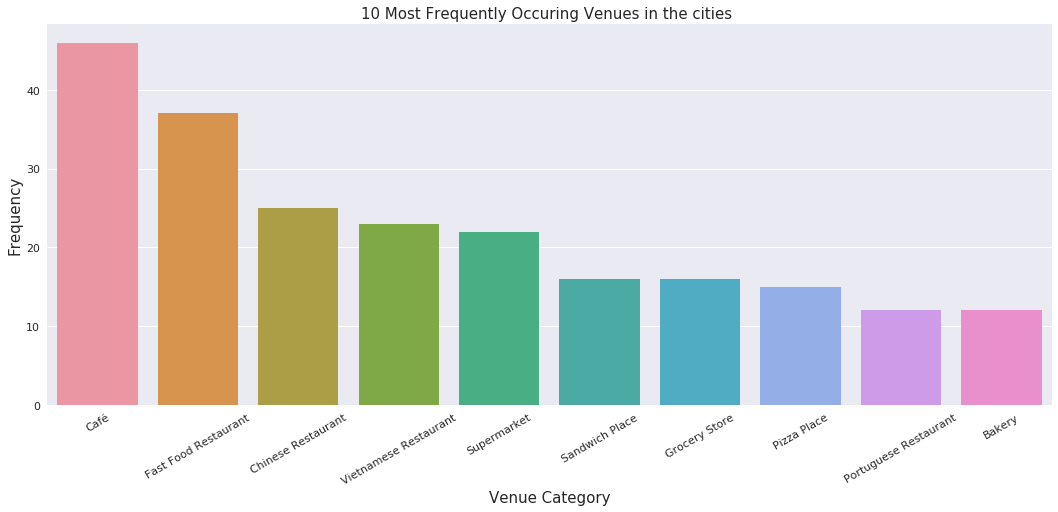

In [127]:
import seaborn as sns
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Venue_Category", y="Frequency", data=Melbourne_venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('10 Most Frequently Occuring Venues in the cities ', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues.png", dpi=300)
plt.show()



In [128]:
### Use One Hot Encoding to Get More Information about the Venue Categories 
Melbourne_Venues_onehot = pd.get_dummies(Melbourne_venues[['Venue_Category']], prefix="", prefix_sep="")

### add city column back to dataframe
Melbourne_Venues_onehot['City'] = Melbourne_venues['City'] 
### move city column to the first column
fixed_columns = [Melbourne_Venues_onehot.columns[-1]] + list(Melbourne_Venues_onehot.columns[:-1])
Melbourne_Venues_onehot = Melbourne_Venues_onehot[fixed_columns]


In [129]:
Melbourne_venues_Grouped = Melbourne_Venues_onehot.groupby('City').mean().reset_index()
Melbourne_venues_Grouped.index = np.arange(1, len(Melbourne_venues_Grouped)+1)
Melbourne_venues_Grouped

,City,Afghan Restaurant,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,BBQ Joint,Bakery,Bar,Baseball Field,Basketball Court,...,Track,Trail,Train,Train Station,Turkish Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Water Park,Xinjiang Restaurant
1,Berwick,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.0000,0.000000
2,Brimbank,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.25,0.000000,0.250000,0.000000,0.000000,0.000,0.000000,0.0000,0.000000
3,Casey,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0625,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.0625,0.000000
4,Chadstone,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.038462,0.0000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.0000,0.000000
5,Clayton,0.000000,0.000000,0.000000,0.000000,0.0,0.071429,0.000000,0.000000,0.0000,...,0.000000,0.00,0.000000,0.035714,0.035714,0.000000,0.000,0.035714,0.0000,0.000000
6,Cranbourne,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.00,0.000000,0.062500,0.000000,0.000000,0.000,0.000000,0.0000,0.000000
7,Dandenong,0.034483,0.000000,0.034483,0.000000,0.0,0.034483,0.000000,0.000000,0.0000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.0000,0.000000
8,Deer Park,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.00,0.000000,0.083333,0.000000,0.000000,0.000,0.166667,0.0000,0.000000
9,Endeavour Hills,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.058824,0.000,0.000000,0.0000,0.000000
10,Glen Waverley,0.000000,0.000000,0.015873,0.000000,0.0,0.015873,0.000000,0.000000,0.0000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.0000,0.000000


In [130]:
num_top_venues = 10

for places in Melbourne_venues_Grouped['City']:
    print("------"+places+"------")
    temp = Melbourne_venues_Grouped[Melbourne_venues_Grouped['City'] == places].T.reset_index()
    temp.columns = ['Venue','Freq']
    temp = temp.iloc[1:]
    temp['Freq'] = temp['Freq'].astype(float)
    temp = temp.round({'Freq': 2})
    print(temp.sort_values('Freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

------Berwick------
                Venue  Freq
0                Café  0.29
1         Bus Station  0.14
2                Park  0.07
3        Burger Joint  0.07
4         Coffee Shop  0.07
5         Supermarket  0.07
6       Grocery Store  0.07
7  Italian Restaurant  0.07
8              Garden  0.07
9     Thai Restaurant  0.07


------Brimbank------
                           Venue  Freq
0                           Lake  0.25
1                  Train Station  0.25
2                          Trail  0.25
3                           Café  0.25
4                         Lounge  0.00
5  Paper / Office Supplies Store  0.00
6                            Pub  0.00
7                    Post Office  0.00
8          Portuguese Restaurant  0.00
9                          Plaza  0.00


------Casey------
                  Venue  Freq
0  Fast Food Restaurant  0.12
1         Grocery Store  0.12
2                  Café  0.12
3        Ice Cream Shop  0.06
4            Food Court  0.06
5         Shopping M

               Venue  Freq
0  Convenience Store  0.12
1        Sports Club  0.12
2        Supermarket  0.12
3        Video Store  0.12
4                Gym  0.12
5        Pizza Place  0.12
6      Shopping Mall  0.12
7              Hotel  0.12
8          Pet Store  0.00
9          Pawn Shop  0.00


------Tooradin------
                   Venue  Freq
0          Grocery Store   0.2
1         Scenic Lookout   0.2
2     Italian Restaurant   0.2
3                 Bakery   0.2
4      Fish & Chips Shop   0.2
5                   Park   0.0
6                    Pub   0.0
7            Post Office   0.0
8  Portuguese Restaurant   0.0
9                  Plaza   0.0


------Werribee------
                   Venue  Freq
0                   Café  0.18
1      Indian Restaurant  0.07
2       Asian Restaurant  0.07
3   Fast Food Restaurant  0.07
4                    Pub  0.07
5         Ice Cream Shop  0.04
6                    Gym  0.04
7  Portuguese Restaurant  0.04
8  Performing Arts Venue  0.04
9     

# Create a DataFrame with Top 10 Venues for Each City

In [131]:
## Define a Function to select the top 10 rows (According to the Values) 

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
City_top10_venues_sorted = pd.DataFrame(columns=columns)
City_top10_venues_sorted['City'] = Melbourne_venues_Grouped['City']

for ind in np.arange(Melbourne_venues_Grouped.shape[0]):
    City_top10_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Melbourne_venues_Grouped.iloc[ind, :], num_top_venues)

    
City_top10_venues_sorted.index = np.arange(1, len(City_top10_venues_sorted)+1)
City_top10_venues_sorted

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Berwick,Café,Bus Station,Grocery Store,Coffee Shop,Italian Restaurant,Burger Joint,Supermarket,Park,Garden,Thai Restaurant
2,Brimbank,Trail,Lake,Train Station,Café,Flea Market,Furniture / Home Store,Fried Chicken Joint,Food Truck,Food Stand,Food Court
3,Casey,Café,Fast Food Restaurant,Grocery Store,Basketball Court,Food Court,Stadium,Skate Park,Shopping Mall,Gastropub,Sandwich Place
4,Chadstone,Fast Food Restaurant,Japanese Restaurant,Gas Station,Supermarket,Pub,Café,Pizza Place,Portuguese Restaurant,Park,Hotel
5,Clayton,Sandwich Place,Indonesian Restaurant,Malay Restaurant,Korean Restaurant,Bakery,Supermarket,Pizza Place,Portuguese Restaurant,Pakistani Restaurant,Shopping Mall
6,Cranbourne,Fast Food Restaurant,Sandwich Place,Café,Grocery Store,Food Court,Gastropub,Shopping Mall,Sports Bar,Department Store,Train Station
7,Dandenong,Fast Food Restaurant,Indian Restaurant,Café,Supermarket,Flea Market,Movie Theater,Hotel,Hobby Shop,Gym / Fitness Center,Grocery Store
8,Deer Park,Vietnamese Restaurant,Pizza Place,Middle Eastern Restaurant,Café,Train Station,Restaurant,Fish & Chips Shop,Burger Joint,Chinese Restaurant,Malay Restaurant
9,Endeavour Hills,Café,Supermarket,Business Service,Chinese Restaurant,Event Service,Coffee Shop,Fried Chicken Joint,Food Truck,Shopping Mall,Department Store
10,Glen Waverley,Chinese Restaurant,Hotel,Japanese Restaurant,Malay Restaurant,Supermarket,Fast Food Restaurant,Dim Sum Restaurant,Dessert Shop,Pizza Place,Thai Restaurant


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


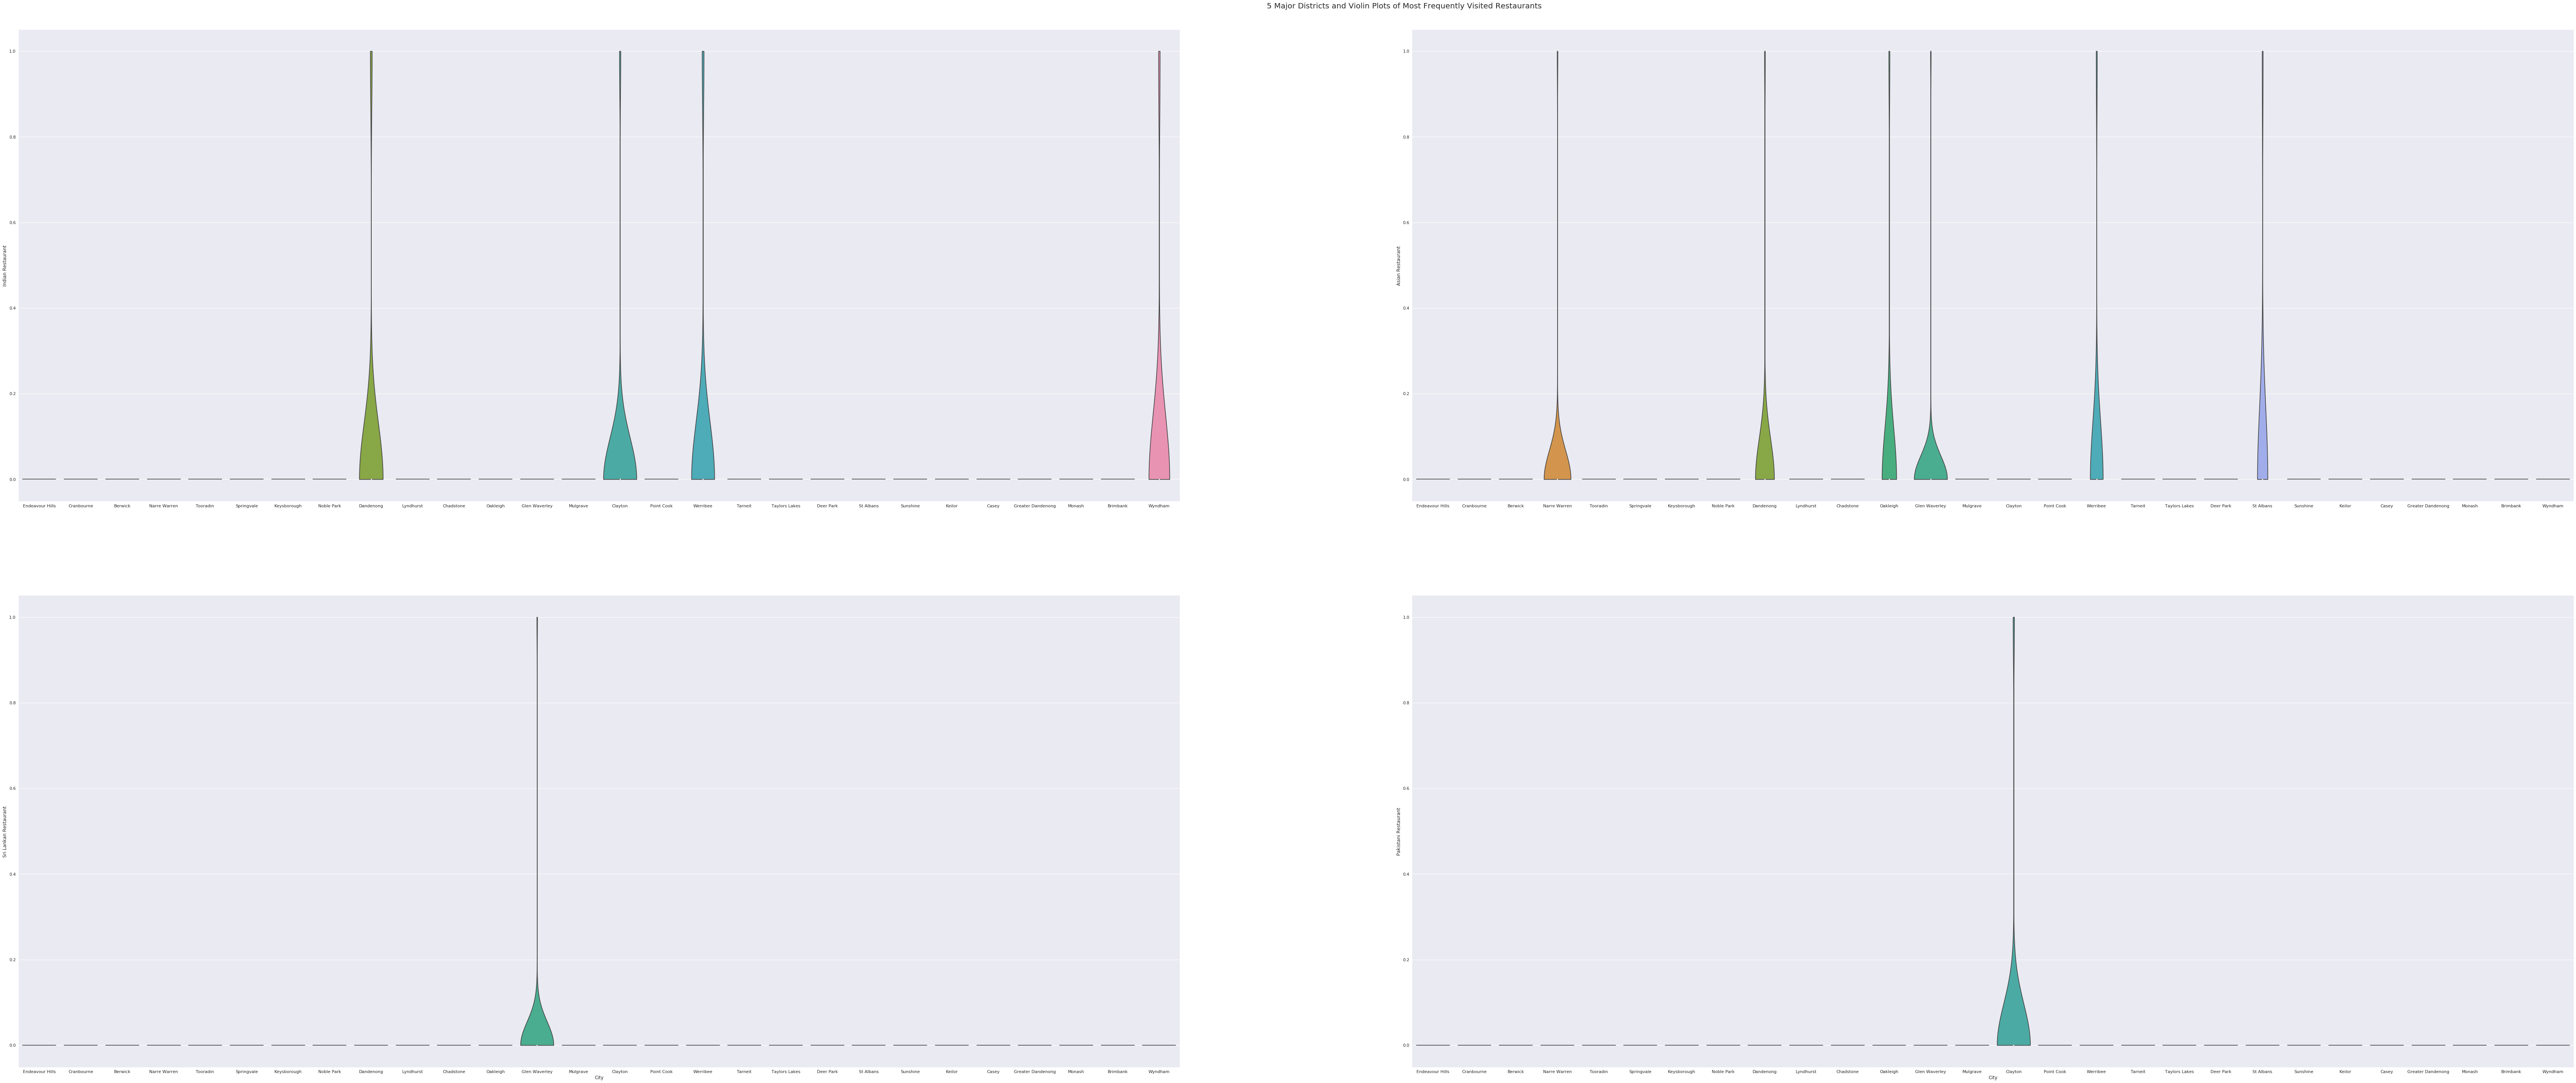

In [132]:
# Let's try Categorical plot 


fig = plt.figure(figsize=(120,50))

sns.set(font_scale=1.1)
ax = plt.subplot(2,2,1)
sns.violinplot(x="City", y="Indian Restaurant", data=Melbourne_Venues_onehot, cut=0);
plt.xlabel("")
ax = plt.subplot(2,2,2)
sns.violinplot(x="City", y="Asian Restaurant", data=Melbourne_Venues_onehot, cut=0);
plt.xlabel("")
plt.subplot(2,2,3)
sns.violinplot(x="City", y="Sri Lankan Restaurant", data=Melbourne_Venues_onehot, cut=0);
plt.subplot(2,2,4)
sns.violinplot(x="City", y="Pakistani Restaurant", data=Melbourne_Venues_onehot, cut=0);
#ax.title.set_text("5 Major Districts and Violin Plots of Most Frequently Visited Restaurants")
ax.text(-4.0, 1.1, '5 Major Districts and Violin Plots of Most Frequently Visited Restaurants', fontsize=20)
plt.savefig ("Violin_plots_Dist_Frequent_Restaurant.png", dpi=240)
plt.show()



[2, 0, 2, 10, 15, 3, 9, 6, 2, 26, 0, 12, 5, 2, 0, 2, 12, 2, 14, 0, 16, 4, 12, 1, 0, 1, 9, 4]


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


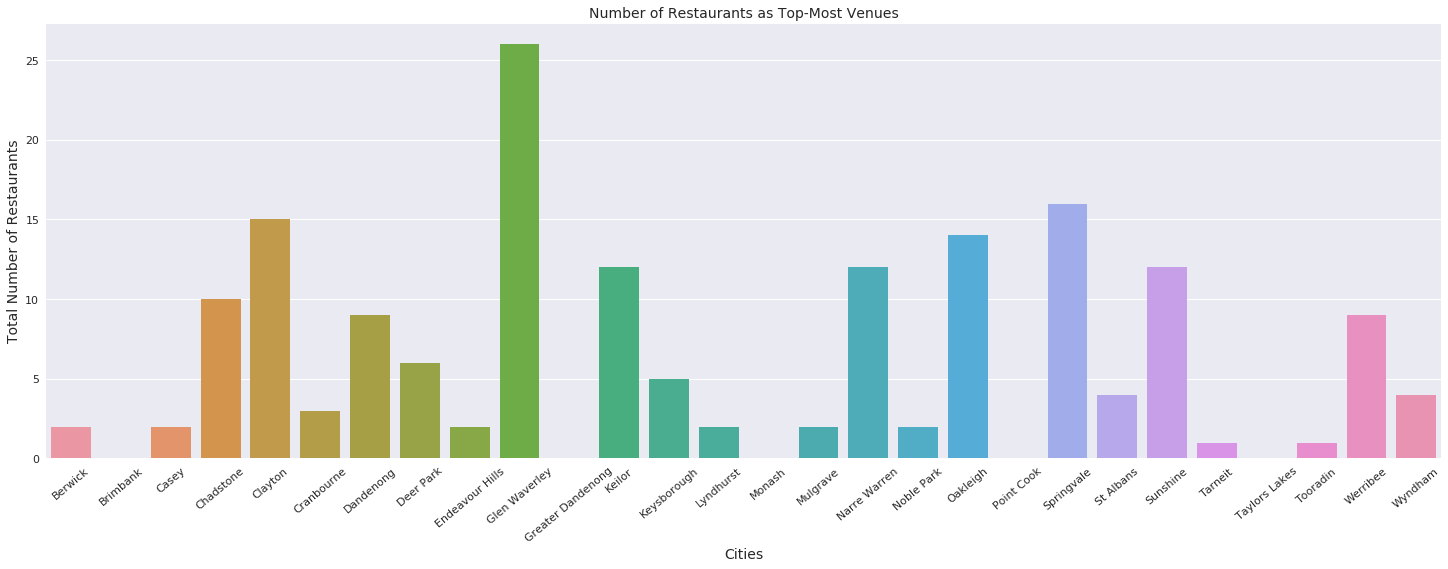

In [133]:
#try groupby to play with restaurant 
Melbourne_venues_restaurant = Melbourne_venues.groupby(['City'])['Venue_Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())
Melbourne_venues_restaurant_df = Melbourne_venues_restaurant.to_frame().reset_index()
Melbourne_venues_restaurant_df.columns = ['City', 'Number of Restaurant']

Melbourne_venues_restaurant_df.index = np.arange(1, len(Melbourne_venues_restaurant_df)+1)
Melbourne_venues_restaurant_df

list_rest_no = Melbourne_venues_restaurant_df['Number of Restaurant'].tolist()
print(list_rest_no)
fig = plt.figure(figsize=(25,8))
bar = sns.barplot(x='City', y='Number of Restaurant', data=Melbourne_venues_restaurant_df)

bar.set_ylabel("Total Number of Restaurants", fontsize=14)
bar.set_xlabel("Cities", fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=40)
bar.set_title("Number of Restaurants as Top-Most Venues", fontsize=14)
#plt.savefig("No_of_Rest_as_Top_Venues.png", dpi=240)
plt.show()


# Clustering the Melbourne Suburbs (Neighborhoods) using K-Means

In [134]:
# set number of clusters
kclusters = 5

Melbourne_grouped_clustering = Melbourne_venues_Grouped.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Melbourne_grouped_clustering)

# check cluster labels generated for each row in the dataframe
print ("Check the 5 Cluster labels :",  kmeans.labels_[0:10])

Check the 5 Cluster labels : [3 3 3 0 0 3 0 0 0 0]


In [135]:
# add clustering labels

City_top10_venues_sorted.insert(0, 'Cluster Label', kmeans.labels_)
# add clustering labels

Melbourne_merged=df_data_2
Melbourne_merged = Melbourne_merged.join(City_top10_venues_sorted.set_index('City'), on='City')

Melbourne_merged # check the last columns!

,City,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Endeavour Hills,-37.9759,145.2578,0,Café,Supermarket,Business Service,Chinese Restaurant,Event Service,Coffee Shop,Fried Chicken Joint,Food Truck,Shopping Mall,Department Store
1,Cranbourne,-38.1083,145.2844,3,Fast Food Restaurant,Sandwich Place,Café,Grocery Store,Food Court,Gastropub,Shopping Mall,Sports Bar,Department Store,Train Station
2,Berwick,-38.0309,145.3461,3,Café,Bus Station,Grocery Store,Coffee Shop,Italian Restaurant,Burger Joint,Supermarket,Park,Garden,Thai Restaurant
3,Narre Warren,-38.0271,145.3030,0,Fast Food Restaurant,Department Store,Portuguese Restaurant,Electronics Store,Café,Pet Store,Gym / Fitness Center,Convenience Store,Sandwich Place,Fried Chicken Joint
4,Tooradin,-38.2111,145.3800,0,Italian Restaurant,Scenic Lookout,Bakery,Fish & Chips Shop,Grocery Store,Garden,Electronics Store,Event Service,Farmers Market,Fast Food Restaurant
5,Springvale,-37.9519,145.1521,0,Vietnamese Restaurant,Grocery Store,Bakery,Shopping Mall,Chinese Restaurant,Xinjiang Restaurant,Stables,Hookah Bar,Fast Food Restaurant,Farmers Market
6,Keysborough,-37.9917,145.1738,0,Fast Food Restaurant,Supermarket,Coffee Shop,Café,Pharmacy,Sandwich Place,Paper / Office Supplies Store,Department Store,Convenience Store,Chinese Restaurant
7,Noble Park,-37.9674,145.1765,0,Convenience Store,Vietnamese Restaurant,Pharmacy,Chinese Restaurant,Smoke Shop,Train Station,Train,Supermarket,Sandwich Place,Xinjiang Restaurant
8,Dandenong,-37.9875,145.2149,0,Fast Food Restaurant,Indian Restaurant,Café,Supermarket,Flea Market,Movie Theater,Hotel,Hobby Shop,Gym / Fitness Center,Grocery Store
9,Lyndhurst,-38.0483,145.2439,3,Fast Food Restaurant,Sandwich Place,Park,Liquor Store,Café,Hotel,Portuguese Restaurant,Event Service,Farmers Market,Furniture / Home Store


In [153]:
# create map
map_clusters = folium.Map(location=[Melbourne_latitude, Melbourne_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
#markers_colors = []

for lat, lon, poi, cluster in zip(Melbourne_merged['Latitude'], 
                                  Melbourne_merged['Longitude'], 
                                  Melbourne_merged['City'], 
                                  Melbourne_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [147]:
# create map
map_restaurants10 = folium.Map(location=[Melbourne_latitude, Melbourne_longitude], tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
City=['Endeavour Hills','Cranbourne','Berwick','Narre Warren','Tooradin','Springvale','Keysborough','Noble Park','Dandenong','Lyndhurst','Chadstone','Oakleigh','Glen Waverley','Mulgrave','Clayton','Point Cook','Werribee','Tarneit','Taylors Lakes','Deer Park','St Albans','Sunshine','Keilor','Casey','Greater Dandenong','Monash','Brimbank','Wyndham']

rainbow=['#FF0000', '#008000','#FFFF00','#0000FF' ,'#800080','#800000','#bc8f8f','#808080','#fffaf0','#ffb6c1','#9400d3','#0000ff','#87cefa','#40e0d0','#006400', '#ffff00','#8b0000','#f08080' ,'#00ffff','#800000','#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000','#800000','#00008b','#6a5acd']



# add markers to the map
for lat, lon, city, cluster in zip(Melbourne_merged['Latitude'], 
                                  Melbourne_merged['Longitude'], 
                                  Melbourne_merged['City'], 
                                  Melbourne_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[City.index(city)]*0.5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_restaurants10)
       
map_restaurants10

# Explore the 3 Clusters

# Cluster 1

In [138]:
Melbourne_merged.loc[Melbourne_merged['Cluster Label'] == 0]


,City,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Endeavour Hills,-37.9759,145.2578,0,Café,Supermarket,Business Service,Chinese Restaurant,Event Service,Coffee Shop,Fried Chicken Joint,Food Truck,Shopping Mall,Department Store
3,Narre Warren,-38.0271,145.3030,0,Fast Food Restaurant,Department Store,Portuguese Restaurant,Electronics Store,Café,Pet Store,Gym / Fitness Center,Convenience Store,Sandwich Place,Fried Chicken Joint
4,Tooradin,-38.2111,145.3800,0,Italian Restaurant,Scenic Lookout,Bakery,Fish & Chips Shop,Grocery Store,Garden,Electronics Store,Event Service,Farmers Market,Fast Food Restaurant
5,Springvale,-37.9519,145.1521,0,Vietnamese Restaurant,Grocery Store,Bakery,Shopping Mall,Chinese Restaurant,Xinjiang Restaurant,Stables,Hookah Bar,Fast Food Restaurant,Farmers Market
6,Keysborough,-37.9917,145.1738,0,Fast Food Restaurant,Supermarket,Coffee Shop,Café,Pharmacy,Sandwich Place,Paper / Office Supplies Store,Department Store,Convenience Store,Chinese Restaurant
7,Noble Park,-37.9674,145.1765,0,Convenience Store,Vietnamese Restaurant,Pharmacy,Chinese Restaurant,Smoke Shop,Train Station,Train,Supermarket,Sandwich Place,Xinjiang Restaurant
8,Dandenong,-37.9875,145.2149,0,Fast Food Restaurant,Indian Restaurant,Café,Supermarket,Flea Market,Movie Theater,Hotel,Hobby Shop,Gym / Fitness Center,Grocery Store
10,Chadstone,-37.8879,145.0952,0,Fast Food Restaurant,Japanese Restaurant,Gas Station,Supermarket,Pub,Café,Pizza Place,Portuguese Restaurant,Park,Hotel
12,Glen Waverley,-37.8785,145.1648,0,Chinese Restaurant,Hotel,Japanese Restaurant,Malay Restaurant,Supermarket,Fast Food Restaurant,Dim Sum Restaurant,Dessert Shop,Pizza Place,Thai Restaurant
13,Mulgrave,-37.9215,145.1584,0,Electronics Store,Park,Café,Fast Food Restaurant,Chinese Restaurant,Event Service,Farmers Market,Fish & Chips Shop,Flea Market,Food Court


# Cluster 2

In [139]:
Melbourne_merged.loc[Melbourne_merged['Cluster Label'] == 1]


,City,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Tarneit,-37.8474,144.6884,1,Gas Station,Hotel Bar,Fast Food Restaurant,Furniture / Home Store,Garden Center,Electronics Store,Event Service,Farmers Market,Fish & Chips Shop,Flea Market


# Cluster 3

In [140]:
Melbourne_merged.loc[Melbourne_merged['Cluster Label'] == 2]

,City,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Point Cook,-37.8841,144.7636,2,Pizza Place,Plaza,Fish & Chips Shop,Xinjiang Restaurant,Italian Restaurant,Electronics Store,Event Service,Farmers Market,Fast Food Restaurant,Flea Market


# Cluster 4

In [141]:
Melbourne_merged.loc[Melbourne_merged['Cluster Label'] == 3]

,City,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Cranbourne,-38.1083,145.2844,3,Fast Food Restaurant,Sandwich Place,Café,Grocery Store,Food Court,Gastropub,Shopping Mall,Sports Bar,Department Store,Train Station
2,Berwick,-38.0309,145.3461,3,Café,Bus Station,Grocery Store,Coffee Shop,Italian Restaurant,Burger Joint,Supermarket,Park,Garden,Thai Restaurant
9,Lyndhurst,-38.0483,145.2439,3,Fast Food Restaurant,Sandwich Place,Park,Liquor Store,Café,Hotel,Portuguese Restaurant,Event Service,Farmers Market,Furniture / Home Store
11,Oakleigh,-37.8985,145.0884,3,Greek Restaurant,Café,Asian Restaurant,Fast Food Restaurant,Supermarket,Sandwich Place,Portuguese Restaurant,Coffee Shop,Convenience Store,Shopping Mall
16,Werribee,-37.9029,144.6585,3,Café,Pub,Fast Food Restaurant,Indian Restaurant,Asian Restaurant,Portuguese Restaurant,Performing Arts Venue,Park,Paper / Office Supplies Store,Ice Cream Shop
23,Casey,-38.1105,145.2922,3,Café,Fast Food Restaurant,Grocery Store,Basketball Court,Food Court,Stadium,Skate Park,Shopping Mall,Gastropub,Sandwich Place
25,Monash,-37.9015,145.1155,3,Gym,Gym / Fitness Center,Fried Chicken Joint,Café,Gas Station,Grocery Store,Park,Pizza Place,BBQ Joint,Fish & Chips Shop
26,Brimbank,-37.7594,144.8071,3,Trail,Lake,Train Station,Café,Flea Market,Furniture / Home Store,Fried Chicken Joint,Food Truck,Food Stand,Food Court
27,Wyndham,-37.9119,144.6533,3,Café,Lounge,Portuguese Restaurant,Ice Cream Shop,Performing Arts Venue,Fast Food Restaurant,Rock Club,Park,Pizza Place,Burger Joint


# Cluster 5

In [142]:
Melbourne_merged.loc[Melbourne_merged['Cluster Label'] == 4]

,City,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,Greater Dandenong,-38.0061,145.2038,4,Café,Post Office,Cosmetics Shop,Xinjiang Restaurant,Event Service,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Food Court


In [143]:
# Create a Data-Frame out of it to Concentrate Only on Restaurants 

Melbourne_venues_only_restaurant = Melbourne_venues[Melbourne_venues['Venue_Category']\
                                                          .str.contains('Sri Lankan Restaurant'or'Indian Restaurant'or'Pakistani Restaurant')].reset_index(drop=True)
Melbourne_venues_only_restaurant.index = np.arange(1, len(Melbourne_venues_only_restaurant)+1)
print ("Shape of the Data-Frame with Venue Category only Restaurant: ", Melbourne_venues_only_restaurant.shape)
Melbourne_venues_only_restaurant.head(100)

Shape of the Data-Frame with Venue Category only Restaurant:  (1, 7)


,City,City_Latitude,City_Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
1,Glen Waverley,-37.8785,145.1648,Elephant Corridor,-37.880303,145.164883,Sri Lankan Restaurant


[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0]


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


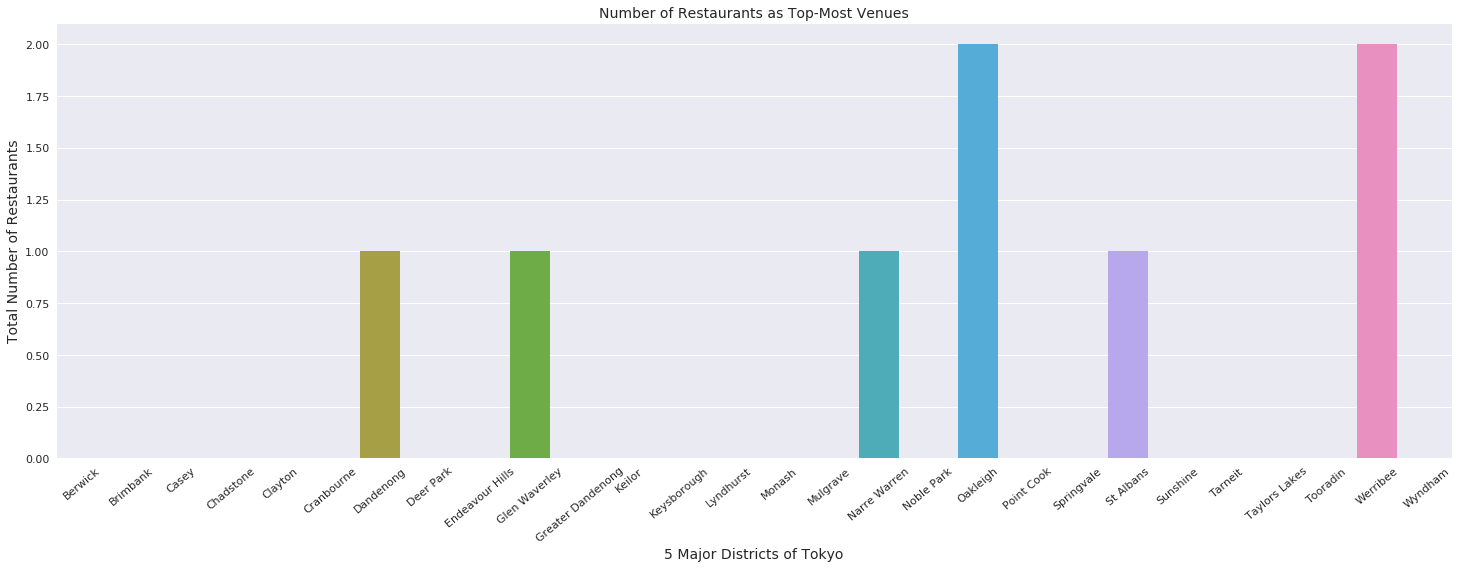

In [144]:
Melbourne_venues_Asian_restaurant = Melbourne_venues.groupby(['City'])['Venue_Category'].apply(lambda x: x[x.str.contains('Asian Restaurant')].count())
Melbourne_venues_Asian_restaurant_df = Melbourne_venues_Asian_restaurant.to_frame().reset_index()
Melbourne_venues_Asian_restaurant_df.columns = ['City', 'Number of Restaurant']

Melbourne_venues_Asian_restaurant_df.index = np.arange(1, len(Melbourne_venues_Asian_restaurant_df)+1)
Melbourne_venues_Asian_restaurant_df

list_rest_no = Melbourne_venues_Asian_restaurant_df['Number of Restaurant'].tolist()
print (list_rest_no)
fig = plt.figure(figsize=(25,8))
bar = sns.barplot(x='City', y='Number of Restaurant', data=Melbourne_venues_Asian_restaurant_df)

bar.set_ylabel("Total Number of Restaurants", fontsize=14)
bar.set_xlabel("5 Major Districts of Tokyo", fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=40)
bar.set_title("Number of Restaurants as Top-Most Venues", fontsize=14)
#plt.savefig("No_of_Rest_as_Top_Venues.png", dpi=240)
plt.show()


[0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1]


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


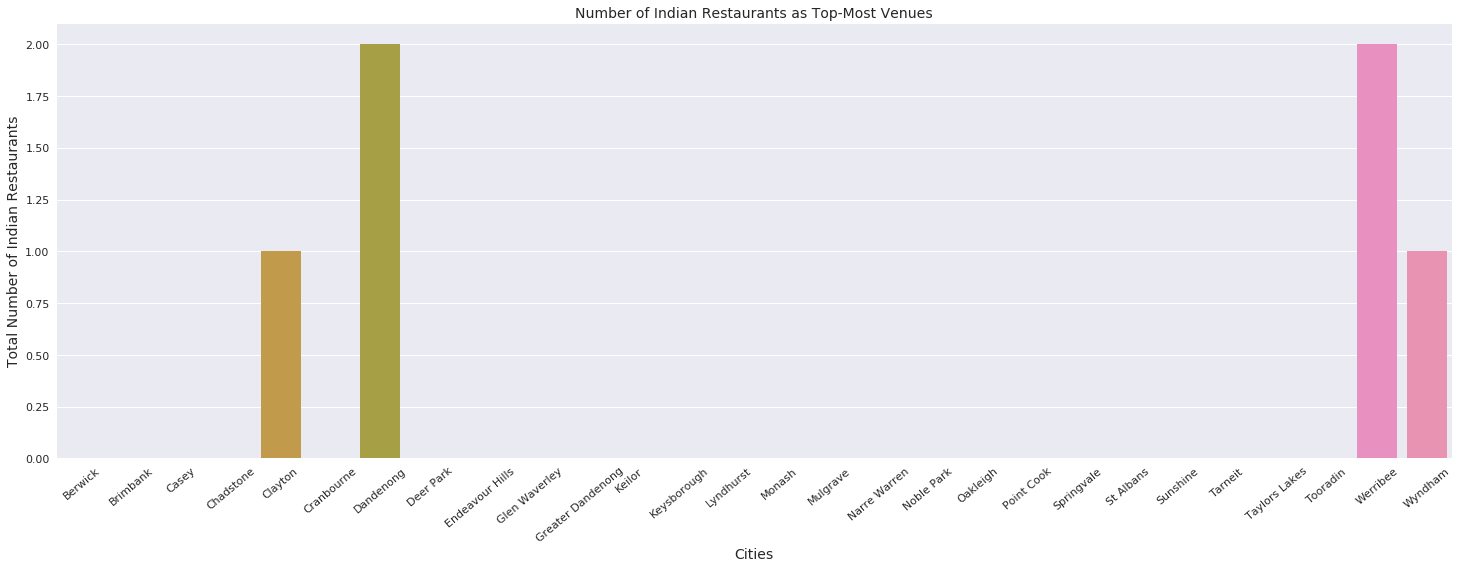

In [145]:
#try groupby to play with restaurant 
Melbourne_venues_Indian_restaurant = Melbourne_venues.groupby(['City'])['Venue_Category'].apply(lambda x: x[x.str.contains('Indian Restaurant')].count())
Melbourne_venues_Indian_restaurant_df = Melbourne_venues_Indian_restaurant.to_frame().reset_index()
Melbourne_venues_Indian_restaurant_df.columns = ['City', 'Number of Restaurant']

Melbourne_venues_Indian_restaurant_df.index = np.arange(1, len(Melbourne_venues_Indian_restaurant_df)+1)
Melbourne_venues_Indian_restaurant_df

list_rest_no = Melbourne_venues_Indian_restaurant_df['Number of Restaurant'].tolist()
print (list_rest_no)
fig = plt.figure(figsize=(25,8))
bar = sns.barplot(x='City', y='Number of Restaurant', data=Melbourne_venues_Indian_restaurant_df)

bar.set_ylabel("Total Number of Indian Restaurants", fontsize=14)
bar.set_xlabel("Cities", fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=40)
bar.set_title("Number of Indian Restaurants as Top-Most Venues", fontsize=14)

plt.show()


[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


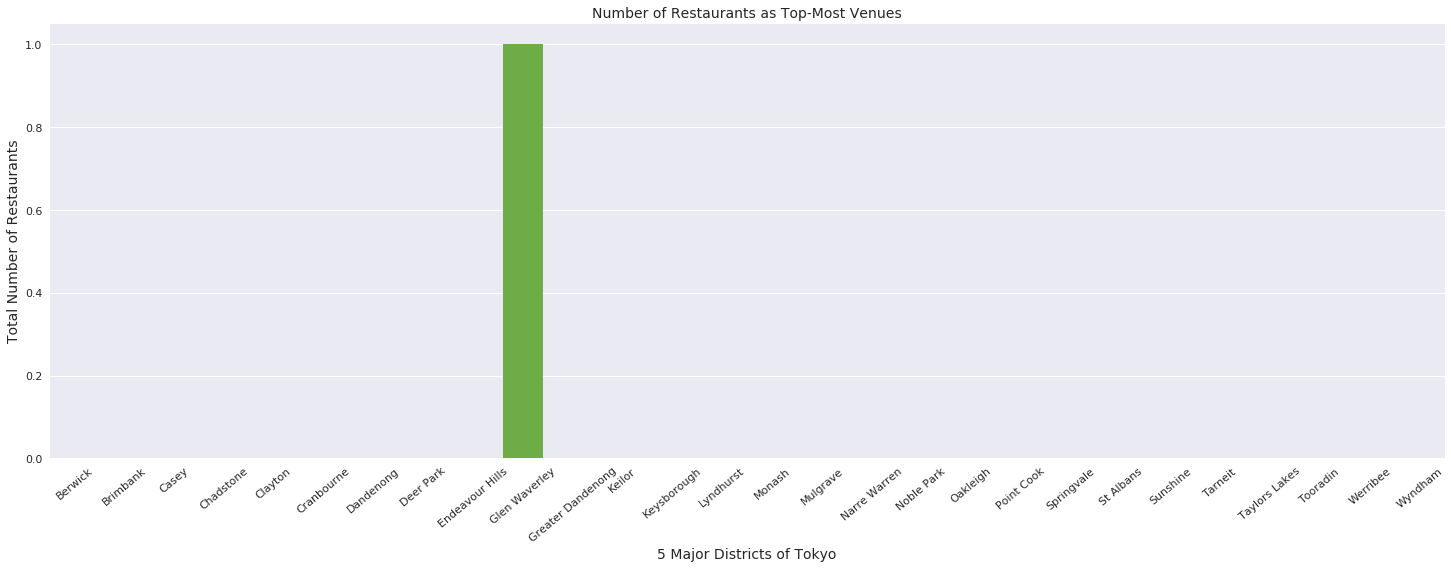

In [146]:
#try groupby to play with restaurant 
Melbourne_venues_Indian_restaurant = Melbourne_venues.groupby(['City'])['Venue_Category'].apply(lambda x: x[x.str.contains('Sri Lankan Restaurant'or 'Pakistan Restaurant')].count())
Melbourne_venues_Indian_restaurant_df = Melbourne_venues_Indian_restaurant.to_frame().reset_index()
Melbourne_venues_Indian_restaurant_df.columns = ['City', 'Number of Restaurant']

Melbourne_venues_Indian_restaurant_df.index = np.arange(1, len(Melbourne_venues_Indian_restaurant_df)+1)
Melbourne_venues_Indian_restaurant_df

list_rest_no = Melbourne_venues_Indian_restaurant_df['Number of Restaurant'].tolist()
print (list_rest_no)
fig = plt.figure(figsize=(25,8))
bar = sns.barplot(x='City', y='Number of Restaurant', data=Melbourne_venues_Indian_restaurant_df)

bar.set_ylabel("Total Number of Restaurants", fontsize=14)
bar.set_xlabel("5 Major Districts of Tokyo", fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=40)
bar.set_title("Number of Restaurants as Top-Most Venues", fontsize=14)
plt.show()